#### Sample ML Workflow

In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import re
import nltk
import string

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, classification_report, 
    precision_score, recall_score, roc_auc_score
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iampr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iampr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/jupyter-masterclass/main/tweet_emotions.csv")

In [30]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [31]:
#delete tweet id
df.drop(columns=['tweet_id'], inplace=True)

In [32]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [33]:
#converting into bincary classification
final_df = df[df['sentiment'].isin(['happiness','sadness'])]

In [34]:
final_df.shape[0]

10374

In [35]:
final_df['sentiment'].replace({
    'happiness': 1,
    'sadness': 0
}, inplace=True)


C:\Users\iampr\AppData\Local\Temp\ipykernel_7176\2133653617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['sentiment'].replace({


In [36]:
final_df.sample(7)

,sentiment,content
12924,0,#justcause Summer Hours say our day ends at 1p...
37743,1,@vieirasboots - all is fine thanks! you guys ...
25873,1,"@MasterSavage cool, i saw it now in the link ..."
33266,1,Is having awesome fruits and vegetable juice a...
2514,0,now i'm awake i can't get back to sleep
22416,1,"@LittleFletcher happy #juddday, carrie"
35374,1,@BarryManilow Not been on for a while eh Barry...


In [37]:
#splitting data into train test split
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

In [38]:
def lemmatization(text):
    """Lemmatize the text."""
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(text)

def remove_stop_words(text):
    """Remove stop words from the text."""
    stop_words = set(stopwords.words("english"))
    text = [word for word in str(text).split() if word not in stop_words]
    return " ".join(text)

def removing_numbers(text):
    """Remove numbers from the text."""
    text = ''.join([char for char in text if not char.isdigit()])
    return text

def lower_case(text):
    """Convert text to lower case."""
    text = text.split()
    text = [word.lower() for word in text]
    return " ".join(text)

def removing_punctuations(text):
    """Remove punctuations from the text."""
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = text.replace('؛', "")
    text = re.sub('\s+', ' ', text).strip()
    return text

def removing_urls(text):
    """Remove URLs from the text."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    """Remove sentences with less than 3 words."""
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    """Normalize the text data."""
    try:
        df['content'] = df['content'].apply(lower_case)
        df['content'] = df['content'].apply(remove_stop_words)
        df['content'] = df['content'].apply(removing_numbers)
        df['content'] = df['content'].apply(removing_punctuations)
        df['content'] = df['content'].apply(removing_urls)
        df['content'] = df['content'].apply(lemmatization)
        return df
    except Exception as e:
        print(e)

In [39]:
train_data = normalize_text(train_data)
test_data = normalize_text(test_data)

In [40]:
train_data.sample(5)

,sentiment,content
16670,0,nkcaump excellent pic wish there long drive tn
13259,0,shanedawson sadly live scotland though shane lt
12908,1,idmoore enjoy day too prob see u top glyders p...
24260,1,chelsea anstee hope expo would amazing im tryi...
15108,0,sookiebontemps ooc thanks ugh what bad bad day...


In [41]:
X_train = train_data['content'].values
y_train = train_data['sentiment'].values

X_test = test_data['content'].values
y_test = test_data['sentiment'].values

In [42]:
#apply BOW vectorizer
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [43]:
train_df = pd.DataFrame(X_train_bow.toarray())
train_df['label'] = y_train

In [44]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14223,14224,14225,14226,14227,14228,14229,14230,14231,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#train xgboost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'mlogloss')
xgb_model.fit(X_train_bow, y_train)

c:\Users\iampr\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [14:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = xgb_model.predict(X_test_bow)

In [47]:
#evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [48]:
accuracy

0.771566265060241

In [49]:
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.75      0.83      0.79      1060\n           1       0.80      0.71      0.75      1015\n\n    accuracy                           0.77      2075\n   macro avg       0.77      0.77      0.77      2075\nweighted avg       0.77      0.77      0.77      2075\n'

In [52]:
#make predictions
y_pred = xgb_model.predict(X_test_bow)
y_pred_proba = xgb_model.predict_proba(X_test_bow)[:, 1]

In [53]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

In [59]:
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"auc: {auc}")

precision: 0.7988950276243094
recall: 0.7123152709359606
auc: 0.8595775629705363


- Above is a complete workflow of a ml problem
- Writing whole code in a single file is not a good way: It will be less collabrative, debugging will be difficult etc
- Ideally we should follow modular coding and create seperate file for each component & join all components - In short, Create a `ML pipeline`
- Next, We will create seperate components of above code:
    1. data ingestion
    2. preprocessing
    3. feature engineering
    4. model building
    5. model evaluation
- Join all components and execute them together using `DVC`
- All the input, output details will be in dvc.yaml


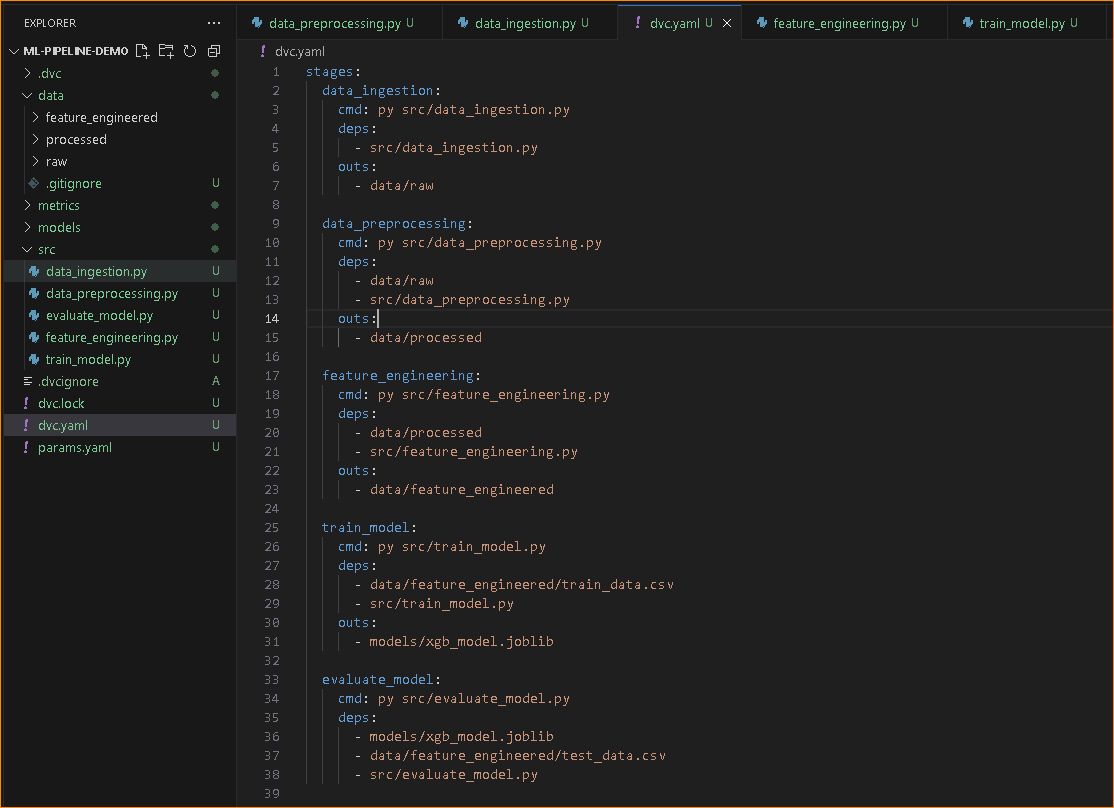

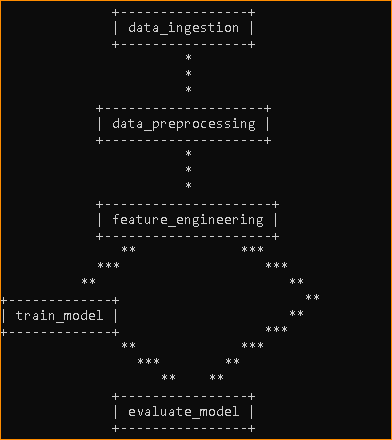

#### Improving ML Pipelines

1. Add params.yaml
2. Add logging & Custom Exceptions
3. Cookie Cutter Project Structure -- xx
4. modular coding -- xx

#### Version Control

* While Git is excellent for tracking `code changes`, machine learning projects also require tracking `data and model files`.
* For this, we use `DVC (Data Version Control)` — a tool that integrates seamlessly with Git to version large files like datasets and models.
* DVC generates lightweight `.dvc` metadata files, which are versioned in Git, while the actual data is stored in a `remote storage` (local or cloud).
* This setup ensures `reproducibility` by tracking code, data, and model versions together in a structured workflow.
* create a demo project where we read data from source, perform some pre-processing and version control code & data and perform another pre-processing and version control code & data

    1. create project folder
    2. git init
    3. dvc init
    4. create github repo & add origin
    5. create dvc remote (cloud or local) - dvc remote add -d myremote C:\Users\iampr\AppData\Local\Temp\dvc_demo
    6. git commit
    7. write data_ingestion 1st pre-processing code - this will generate a csv file inside data folder
    8. run - dvc add data/customer1.csv
        - this will create a cache folder where actual csv file will be stored
        - data folder will have 2 files: .gitignore which will say "dont track customer1.csv" file and one .dvc file which will have metadata of csv file, which is the same file in cache folder
    9. git status: git add new created files in git & git commit
    10. send all codes to git remote (github) and send data files to dvc remote (cloud or local) - dvc push + git push origin main
    11. run 2nd preprocessing code which will change the shape of data
    12. check the changes: git status & dvc status

    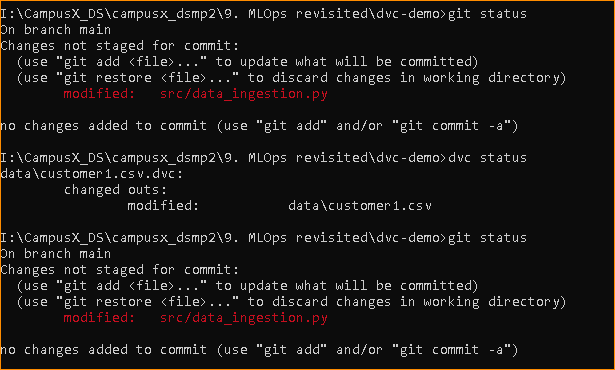

    13. send data to dvc staging - dvc add data/customer1.csv
    14. this will update cache folder with new file and change.dvc file with new metadata

    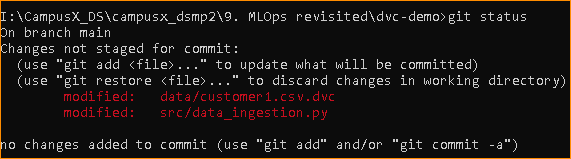

    15. git add, git commit
    16. dvc push & git push
    17. both preprocessing are done, since we are tracking code & data both we can switch to either 1 at any point of time
    
    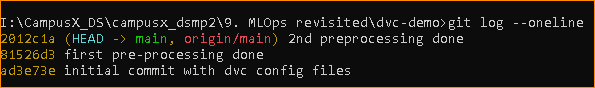

    18. git checkout 81526d3 - this will change the code as in 1st experiment but not data, it will remain like the 2nd one, run dvc checkout to load corresponding data

#### Add DVC in Emotion Detection Project



1. add git remote & dvc remote
2. add code files
3. run dvc repro -- We dont have to track files using dvc add, dvc will automatically track all files in outs
4. all .dvc data will be stored in dvc.lock file
5. we dont have to do dvc add since everything is already done by dvc
6. we can run git add, commit
7. dvc push & git push

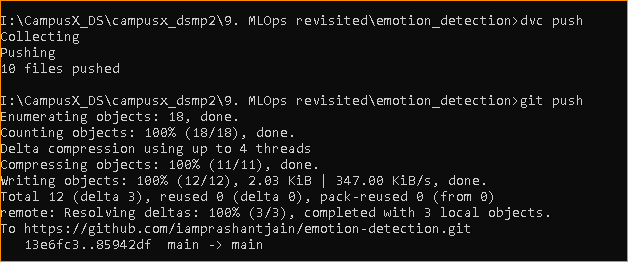

8. make change to indue to run pipeline again - change params, it will re run the pipeline and track data by dvc automatically
9. dvc status will show: "data and pipelne are upto date"
10. git status will show 2 changes: params & git.lock file which will have new metadata for new files

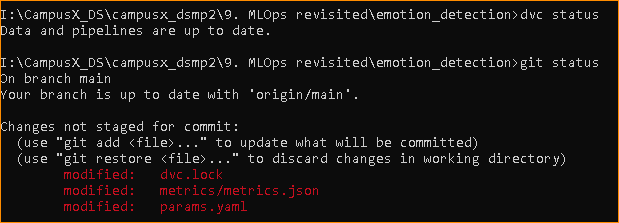

11. now, git add, commit
12. dvc push (send data to remote storage) & git push (send code to remote storage)

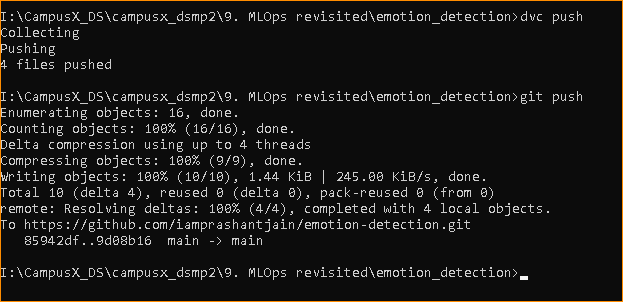

13. In order to go back to previous commits for code & data:
    - git checkout & dvc checkout

14. we also use AWS S3/GCP or any other cloud storage instead of local as remote storage

#### Create another ML Project till here (Laptop Price Predictor)

1. git init
2. dvc init
3. git remote add origin
4. dvc remote -d
5. add code files
6. create params.yaml & dvc.yaml file
7. run dvc repro
8. dvc status will show: Data and pipelines are up to date.
9. but git status will show modifications in data & code file
10. git add commit
11. dvc push & git push

#### Experiment Tracking - MLFlow

- machine learning is all about experimentation since we dont know which technique and algorithm will perform best on any given data
- often we perform multiple experiments like trying different techniques or hyper params to find which method is giving best results
- we can use `Experiment tracking` tools like `MLFlow` to keep track of what params used and what is the accuracy we are getting, This will help us get some insight on effect of params on accuracy or other metrics so we can fidgure out the best params.
- we can use MLFlow in 2 ways:
    1. Solo: I'm the only developer working on a project
    2. Collabrative: Multiple developer working on single project


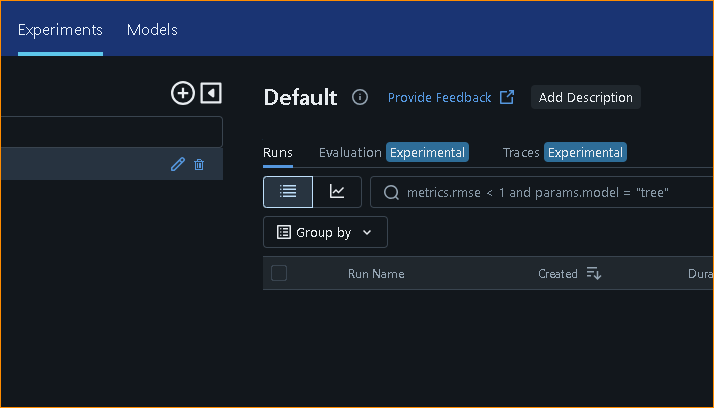

- In `Experiment` tab we will log all experiments
- In `Model` tab we will log all models


- **What is Experiment & Run in MLFlow?**
- Experiment is when we are using 1 algorithm or 1 technique or method
- Run is when we are changing hyper params, Every run with different params will be considered a run

##### sample mlflow project

- with mlflow.start_run context manager
- mlflow.log_ to log
- when creating a seperate experiment, pass the name or id

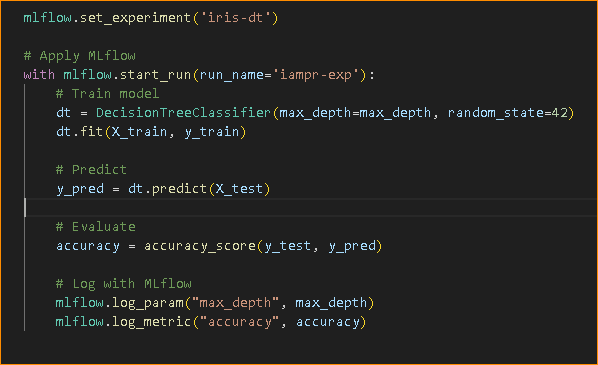

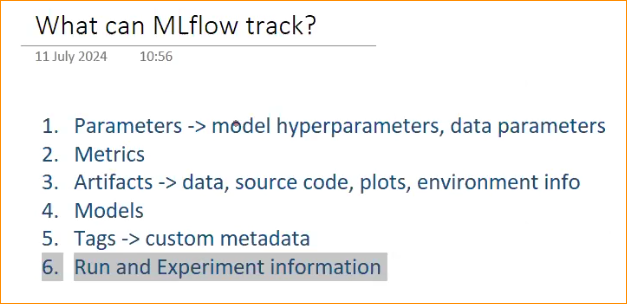

- to log artifacts, we must have set tracking uri, else give error
    * mlflow.set_tracking_uri("http://localhost:5000")

- similarly, we can log model, code, add tags etc

##### MLFlow remote tracking server using Dagshub

- create a github repo
- connect it with dagshub
- copy paste remote experiment tracking code in main code
- run the code and open mlflow tracking uri
- this will be useful in collabrative environment
- we can also set this up using AWS EC2 + S3

##### Advanced MLFlow
1. Auto logging
2. Input data logging
3. Hyper parameter tuning experiment tracking (nested loop parent run & child run) - Benefit of this is that we can compare between runs and visualize how accuracy & other metrics are changing with the change in params
4. Model registry - A Model Registry is like GitHub, but for ML models. It’s a central place to store, manage, and track models through their full lifecycle — from training to production.    
    * Data Scientists: Train models → Save the best ones to the registry
    * ML Engineers: Pick models from the registry → Deploy them to production
    * Model registry manages complete lifecycle of the model (4 stages)
        - development
        - staging (testing in production environment)
        - production
        - retirement (archive this model & create new model)

    * To log model, run experiment & log on mlflow
    * Currently model is logged but not in model registry, to send it to model registry - click on `model registry` button.
    - In models tab, All models of the project by the team will be visible here
    - Its is None stage mean its in development stage
    - source run will show all the details and experiments related to that model
    - Here on we can change the stage of the model from development(none) to staging to production
    - Again, When the performance degrades for this model, we will retrain another model & push that model --> version upgrade of that model to this model from statging to production and archive previous model

    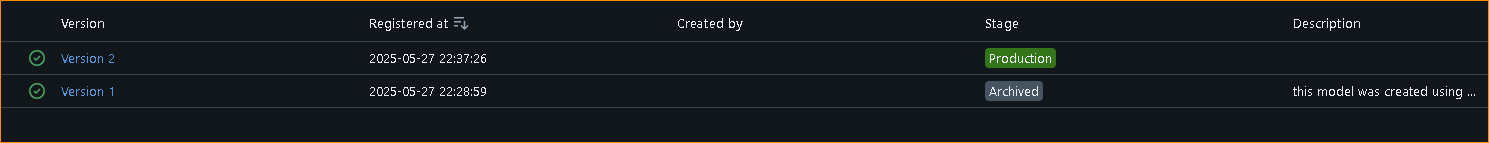

#### The Big Picture!

- ml project 
- code versioning
- dvc pipeline
- dvc data versioning
- experiment tracking - mlflow - dagshub
- model registry - mlflow

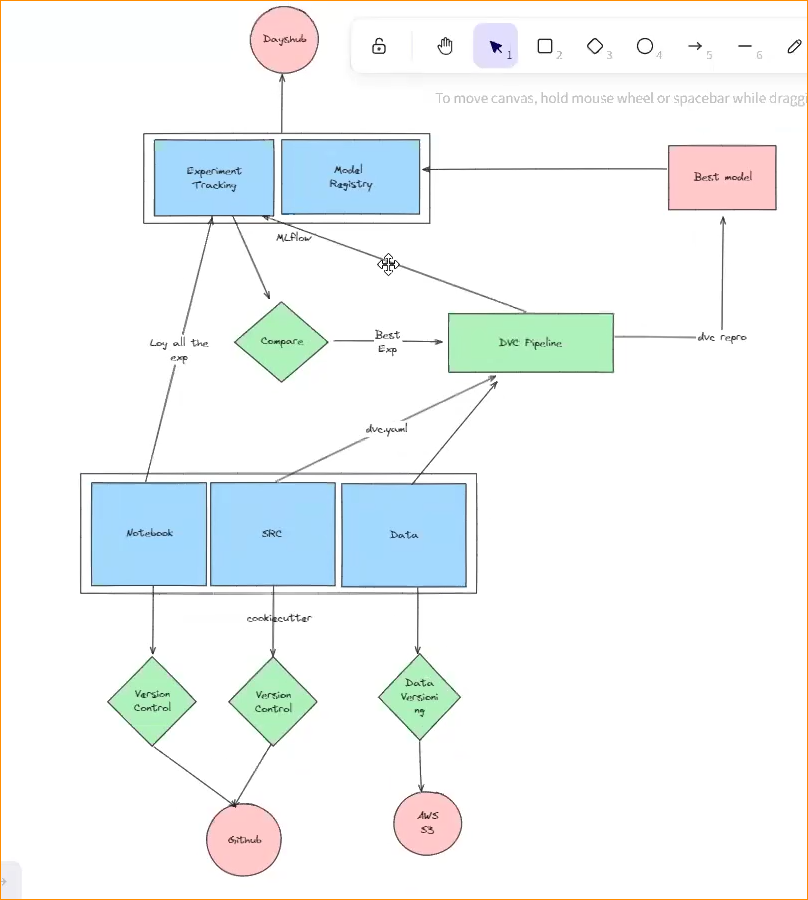

#### 1. Mini Project (Till ML in ML + OPS)

1. create project folder using cookie-cutter : cookiecutter -c v1 http://github.com/drivendata/cookiecutter-data-science
2. create venv
3. github repo of the project
4. install mlflow on dagshub
5. Run multiple experiments in notebook- store code on github / store data on local or s3
    * find which vectorization technique --> find which algorithm --> find best params of that algorithm --> create dvc pipeline of that combo
    * run 3 experiments - 
        1. baseline model
        2. nested runs
        3. hyper params
6. visualize mlflow experiments on dagshub
7. Create dvc pipeline of that model (dvc.yaml & params.yaml)
    * dvc init
    * add dvc remote (dvc remote add -d myremote)
    * create dvc pipeline (dvc.yaml & params.yaml)
    * dvc repro
    * dvc push >> git push

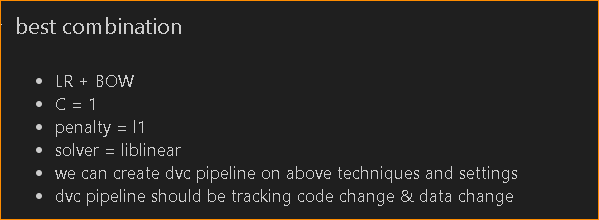

8. Generate model
9. Push model to model registry (in model_evaluation.py stage)
10. dvc pipeline should track source code & data

#### 2. Mini Project (Till ML in ML + OPS) -- Laptop Price Predictor/Car price predictor/something else